## This is a discussion for using Quaternion math for rotations.  <br> It uses some computer science terminology: 'overloads' and 'interface"

Python version 3.8.6 on Windows 10. <br> 

This is documentation for two python files:  q3a.py and plotPrims.py <br>

Some computer science terminology will be used to explain quaternions: 'overload' and 'interface'

In this write up, quaternions use
a format of [Scalar, X, Y, Z] and not [X, Y, Z ,Scalar].  First format is called Hamilton's and 2nd format is called JPL.<br>
This article will use Hamilton's format.

**We present quaternions as having 'overloads'.** 

**First overload is a quaternion that is a rotator.**<br>
In our example, rotator is for Z axis only. <br>

 [Scalar, X, Y, Z] as a 'rotator' becomes  <br>
 
 [Scalar = cos of rotating angle in radians,  <br>
   X = rotating angle about x axis = 0 radians,  <br>
   Y = rotating angle about y axis = 0 radians,  <br>
   Z = rotating angle about z axis = sin of Scalar radians]  <br>
  
 Note:  This is notebook, so reader can change python code to rotate another axis:X Y Z, combination or all.  Also change angle of rotation.

 **2nd overload is a quaternion as a 'pure quaternion'.**  <br>
 
 [scalar, X, Y, Z] becomes [0, X, Y, Z].  <br>
 
 In this example, 'X Y Z' represents a point's coordinates in 3D space.  <br>
 
Note:  plotPrism.py is hard coded to handle a fixed range of X Y Z as coordinate values.  In next version it will handle a wider range.  Reader can also change values of X Y Z.
 
**Overall Algorithm:** 
A 'quaternion rotator' multiplied with 'pure quaternion' to result
 in a 2nd 'pure quaternion'.

 **To display this rotation**
 We fill out wire frames of both pure quaternions. <br>
 Initial (X Y Z) is a vertex  of a prism.<br>
 Rotated (X Y Z) is a vertex of a second prism.<br>
 Both wire frames have a 3D origin, as a vertex (0,0,0).<br>
 Highlighted vertices are original and rotated points.  

 To prove that wire frames are correct representations, run python code, outside of jupyter, and rotate image along its axes.
 
 In fig below we have an image of a rotation.


In [9]:
from IPython.display import Image 
# A highlighted point displayed as a vertex in light blue prism is rotated to a 
# highlighted point, represented as a vertex in a light purple prism
# Rotation is about a 'Z' axis.

!["Result"](img/Result.png)


In [10]:
# Python version 3.8.6 Windows 10
%matplotlib notebook   
#to get plt.show() from plotPrism.py into notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook  
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
plotprism_path = os.path.abspath(os.path.join(''))
print("plotPrism.py must be in following directory")
print("Path string will be from your own computer.  In README.MD value is from my computer")
print(plotprism_path)
if plotprism_path not in sys.path:
    sys.path.append(plotprism_path)
    


plotPrism.py must be in following directory
Path string will be from your own computer.  In README.MD value is from my computer
C:\temp\Copula\_MathReview\01.GA\___WriteUp.Quaternion.Rotate\Display.Quaternion.Rotation-main\Quaternion.python


In [11]:
from plotPrism import plot_prism #plotprism.py


def normalize(v, tolerance=0.00001):
    mag2 = sum(n * n for n in v)
    if abs(mag2 - 1.0) > tolerance:
        mag = math.sqrt(mag2)
        v = tuple(n / mag for n in v)
    return np.array(v)

## Key math algorithms.



Hamilton solved several issues to make this work.
He devised quaternion structures, their overloads and a complex number interface for quaternion multiplication.
We have covered two quaternion overloads, that are used in rotations.

This complex number interface reduces a multiplication of two quaternions to a quaternion result.  In our example it's used to multiply a 'rotator quaternion' and 'pure quaternion' and conjuate of a 'rotator quaternion'.  Result is a 'pure quaternion'


## 'Complex Number Interface' to generate multiplication algorithm for quaternions

When a quaternion multiplies a 2nd quaternion, Hamilton used 'exterior product'. <br>
Quaternion 1: [a0,a1,a2,a3] <br>
Quaternion 2: [b0,b1,b2,b3] <br>

**Result of multiplying Quaternion 2 by Quaternion 1:** <br>
a0b0 + a0b1 + a0b2+ a0b3 + <br>
a1b0 + a1b1 + a1b2+ a1b3 + <br>
a2b0 + a2b1 + a2b2+ a2b3 + <br>
a3b0 + a3b1 + a3b2+ a3b3  <br>

In this example, with a 'complex number interface' we could then reduce these multiplication results to a [X Y Z] or 'pure quaternion'.



### Generate a  'Complex Number Interface' to get a quaternion multiplication function

A complex number interface also has three axes: i, j, k.  They interface to X,Y,Z axis.  In our example, this interface will allow us to simplify a quaternion multiplication to a pure quaternion.

First we need some rules for complex number multiplication.  With these rules we will substitute pairs of complex numbers with a single complex number.  This yields our X, Y, Z rotated point.

**Hamilton discovered that**<br>
ijk = -1 and of course ii, jj, kk = -1.<br>
It's not commutative.  kj neq jk. But kj eq -jk (neq is not equal)<br>

First step in this interface is to create a translation where pairs of complex number equal a single complex number.

ijk = -1 # Hamilton's discovery<br>
iijk = -i # we multiply each side by 'i'<br>
-jk = -i # ii = -1 <br>
jk = i  AND kj = -i <br>

ijk = -1<br>
-ikj = -1  # jk = -kj <br>
kij = -i<br>
kkij = -k  <br>
-ij = -k
ij=k  AND ji = -k<br>

ijk = -1<br>
-jik = -1<br>
-jjik = -j<br>
ik = -j  AND ki = j<br>

**Now we redo multiplication of two quaternions (regardless of overload)**<br>
Note: we need additional layers of indices to work with our complex number interface.<br>
Quaternion 1: [a0,a1i,a2j,a3k] This is [Scalar, i, j, k] <br> 
Quaternion 2: [b0,b1i,b2j,b3k]<br>

**Result of multiplying Quaternion 2 by Quaternion 1:** <br>

 a0b0 + a0b1i + a0b2j+ a0b3k + # we multiply Quaternion 2 by a0<br>
 a1ib0 + a1ib1i + a1ib2j+ a1ib3k +<br>
 a2jb0 + a2jb1i + a2jb2j+ a2jb3k +<br>
 a3kb0 + a3kb1i + a3kb2j+ a3kb3k <br>

**We restate this result by collecting complex variables together.**<br>

a0b0 + (a0b1)i + (a0b2)j+ (a0b3)k +<br>
(a1b0)i + (a1b1)ii + (a1b2)ij+ (a1b3)ik +<br>
(a2b0)j + (a2b1)ji + (a2b2)jj+ (a2b3)jk +<br>
(a3b0)k + (a3b1)ki + (a3b2)kj+ (a3b3)kk <br>

**Then we substitute pairs of complex variables with a single complex variable, from our translations.**<br>

a0b0 + (a0b1)i + (a0b2)j+ (a0b3)k +<br>
(a1b0)i + (a1b1)-1 + (a1b2)k+ (a1b3)-j +<br>
(a2b0)j + (a2b1)-k + (a2b2)-1+ (a2b3)i +<br>
(a3b0)k + (a3b1)j + (a3b2)-i+ (a3b3)-1 <br>

**Finally, we group by scalar or i, j, k**<br>

a0b0 - (a1b1) - (a2b2) -(a3b3)   # **Scalars** <br>
((a0b1) +a1b0) + (a2b3) - (a3b2))i  # **i's**<br>
((a0b2) - (a1b3) + (a2b0) + (a3b1)j  # **j's**<br>
((a0b3) + (a1b2) - (a2b1) +  (a3b0))k  # **k's**<br>

**This give us an interface to generate our quaternion multiplication function for our python file:**

We substitute pq[0] for a0 and r[0] for b0 etc...
This multiplication function will now return a pure quaternion of [Scalar, X, Y ,Z] <br>


In [12]:

def quaternion_mult(r,pq):
    return [pq[0]*r[0]-pq[1]*r[1]-pq[2]*r[2]-pq[3]*r[3], # Scalar
            pq[0]*r[1]+pq[1]*r[0]+pq[2]*r[3]-pq[3]*r[2], # X
            pq[0]*r[2]-pq[1]*r[3]+pq[2]*r[0]+pq[3]*r[1], # Y
            pq[0]*r[3]+pq[1]*r[2]-pq[2]*r[1]+pq[3]*r[0]] # Z



**We complete our rotation algorithm.**
In below code block, you can comment out r_conj in quaternion_mult to examine results.

In [13]:
# pq is pure quaternion
# rq is rotator quaternion
def point_rotation_by_quaternion(pq,rq):
    r = normalize(rq)
    r_conj = [r[0],-1*r[1],-1*r[2],-1*r[3]]
    return quaternion_mult(quaternion_mult(r,pq),r_conj)

**Below are our two overloaded quaternions, with their angle of rotation.** <br>
These values can be changed by reader.<br>
Note that plotPrism.py, currently can only handle a narrow range of values. This will be extended on a next version of code.<br>
**Note:  A formula for rotating a point (x, y) in 2D is given by:** <br>

x': = x * cos (angle) - y * sin (angle) <br>
y': = y * cos (angle) + x * sin (angle) <br>

In [14]:
degrees = math.pi/180;
rot = 180*degrees;
# for rotating about an axis.
w = math.cos(rot/2.);
ax = math.sin(rot/2.);
# quaternion format is [scalar, x, y ,z]
pq = [0, 1, 2, 3]  # pure quaternion.  Scalar is zero.
rq = [w, 0, 0, ax]  # play with ax on different axis: x,y,z  Change values of w and ax.



#### We now apply rotation algorithms

In [15]:
pq2 = point_rotation_by_quaternion(pq,rq)
print(pq2)



[0.0, -0.9999999999999998, -2.0, 3.0]


### We now prep for display purposes

<IPython.core.display.Javascript object>


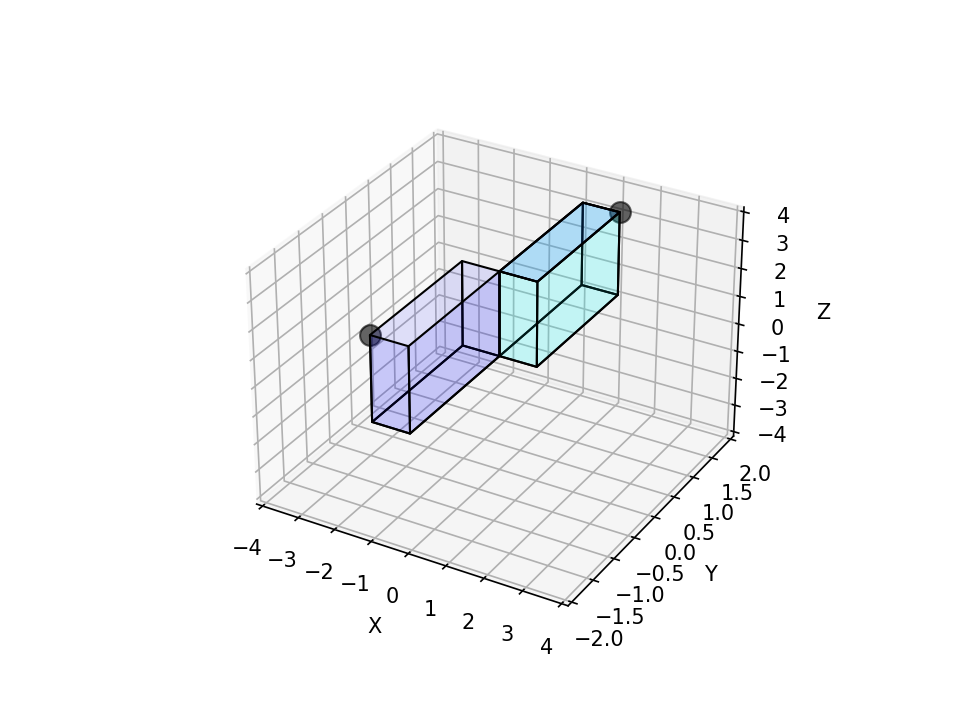

In [16]:
# Fill in a start prism wire frame, using point and a 3D origin as vertices
# Highlight point as vertex

p1 = np.array([0.,0.,0.])
p2 = np.array([pq[1],0.,0.])
p3 = np.array([0.,pq[2],0.])
p4 = np.array([0.,0.,pq[3]])

prism1 = [
    (p1[0],p1[1],p1[2]), (p2[0],p2[1],p2[2]), (p3[0],p3[1],p3[2]), (p4[0],p4[1],p4[2])
]

# Fill in a rotated prism wire frame, using point and a 3D origin as vertices
# Highlight point as vertex

p1A = np.array([0.,0.,0.])
p2A = np.array([pq2[1],0.,0.])
p3A = np.array([0.,pq2[2],0.])
p4A = np.array([0.,0.,pq2[3]])

prism2 = [
    (p1A[0],p1A[1],p1A[2]), (p2A[0],p2A[1],p2A[2]), (p3A[0],p3A[1],p3A[2]), (p4A[0],p4A[1],p4A[2])
]

# to prove that plot is correct, you need to rotate image along its axes.

plot_prism(prism1,prism2)

This image can be rotated by running files q3a.py and plotPrism.py in a python ide like 'Sublime Text'

Notes:  This point being rotated could be a significant point of a geometric object.  For a sphere, it could represent a center. Quaternion rotation is meant to preserve shape.
        